<a href="https://colab.research.google.com/github/Melinnaaa/ADA-Informes/blob/main/informe6_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema: Problema de la selección

**Entrada**: Conjunto de $n$ números diferentes $A$  más un índice $k$.

**Salida**: Elemento $x\in A$, que es mayor a exactamente $k-1$ elementos de $A$.

El elemento $x$ se conoce como **estadístico de orden $k$-ésimo** para el conjunto $A$.

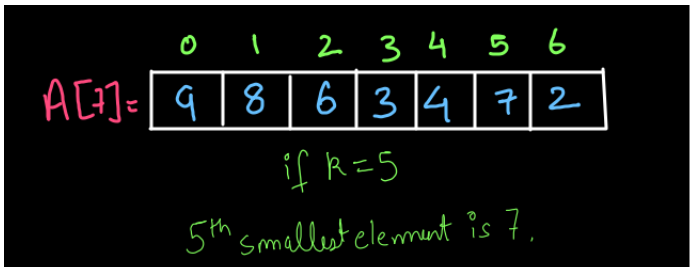

El algortimo que estudiaremos en este informe es **Select**.

Select es un algoritmo que nos encuentra un estadistico de orden deseado en un cierto conjunto de numeros.

Este algoritmo utiliza la **reducción de problemas**, es decir, podemos solucionar un problema A con soluciones de un problema B. Esto debido a que selection utiliza una variación de **Partition* del algoritmo **QuickSort**

**¿Qué es un estadistico de orden?**

En Estadística, el estadístico de orden kº es igual al k-ésimo valor más pequeño de una muestra estadística.

# 2. Selection

## 2.1 Código

In [2]:
def insertionSort(array, cont):
  n = len(array) # Largo del arreglo
  # Se recorre el arreglo, partiendo desde 1
  for i in range(1, n):
    tmp = 0
    pos = array[i] # Valor del elemento en la posición i
    j = i-1 #Indica el valor anterior a la posición i

    # Mientras la posición j sea mayor o igual a 0 y este sea mayor al
    # elemento i-esimo, se ordenarán.
    cont[0] += 1
    while (j >= 0 and pos < array[j]):
      # Se realiza el swap
      array[j+1] = array[j]
      j -= 1
      array[j+1] = pos
      cont[0] += 1
  return array

# Función que divide el arreglo a partir del pivote
def partition(arr, pivot, cont):
  i = 1
  cont[0] += 1
  if pivot !=0:
    arr[0],arr[pivot] = arr[pivot],arr[0]
  cont[0] += 1
  for j in range(1,len(arr)):
    cont[0] += 1
    if arr[j] < arr[0]:
        arr[j],arr[i] = arr[i],arr[j]
        i += 1

  arr[0],arr[i-1] = arr[i-1],arr[0]
  return i-1

# Se selecciona el pivote (mediana de medianas)     
def pivotSelection(arr, cont, verbose = False):
  # Si solo existen 5 elementos obtenemos la mediana de estos.
  cont[0] += 1
  if (len(arr)<=5):
    # Se ordena el arreglo mediante insertionSort
    l = insertionSort(arr, cont)

    if (verbose == True):
      print(l)
      print("El largo del arreglo es <= 5, se retorna su mediana:", l[len(l)//2])
      print("\n")
    return l[len(l)//2]

  # Dividimos el arreglo en 5 partes.
  partitions = [arr[i:(i+5)] for i in range(0,len(arr),5)]
  if (verbose == True):
    print ("Particiones del arreglo:", partitions)

  # Ordenamos las particiones
  sortedPartitions = [insertionSort(i, cont) for i in partitions]
  if (verbose == True):
    print ("Particiones Ordenadas:", partitions)

  # Obtenemos la mediana de cada partición y lo guardamos en un arreglo
  medians = [i[len(i)//2] for i in sortedPartitions]
  if (verbose == True):
    print ("Medianas de las particiones:", medians)
    print("\n")
  
  # La mediana de medianas se obtiene llamando recursivamente a la función
  medianOfMedians = pivotSelection(medians, cont)
  if (verbose == True):
    print("La mediana de medianas es: ", medianOfMedians)
  return medianOfMedians

def select(arr, k, cont, verbose = False):

  cont[0] += 1
  # Si el largo del arreglo es 1 se retorna el elemento.
  if (len(arr) == 1):
    if (verbose == True):
      print("El largo del arreglo es 1, se retorna el elemento:", arr[0])
      print("\n")
    return arr[0]

  # Se obtiene el pivote (mediana de las medianas)
  pivotMedian = pivotSelection(arr, cont, verbose)

  # Se obtiene el indice del pivote (Asumiendo que no hay números repetidos)
  pivotPos = arr.index(pivotMedian)

  # Se llama a partition para que divida el arreglo a partir del pivote obtenido
  q = partition(arr, pivotPos, cont)

  cont[0] += 1
  # Si k == q se retorna el elemento
  if (q == k):
    if (verbose == True):
      print(f"q({q}) == k({k}), se retorna el k-ésimo menor elemento:", arr[q])
      print("\n")
    return arr[q]

  cont[0] += 1
  # Si k < q nos vamos por el lado izquierdo
  if (k < q):
    if (verbose == True):
      print(f"q({q}) < k({k}), nos quedamos con la parte izquierda:", arr[:q])
      print("\n")
    return select(arr[:q], k, cont, verbose)
  
  cont[0] += 1
  # Si k > q nos vamos por el lado derecho
  if (k > q):
    if (verbose == True):
      print(f"q({q}) > k({k}), nos quedamos con la parte derecha:", arr[q + 1:])
      print("\n")
    return select(arr[q+1:], k-q-1, cont, verbose)

# Ejemplo
arr = [10, 4, 5, 8, 6, 11, 26]
cont = [0]
k = 3
print("El elemento k-ésimo es", select(arr, k, cont, verbose = False))
print(cont[0])

El elemento k-ésimo es 8
75


## 2.2 Descripción del algoritmo

El algoritmo **Select** se puede dividir en dos funciones principales:

***Select***

Realiza un trabajo similar al *QuickSort*, en donde el arreglo se particiona en 2 partes, pero *Select* solamente se queda con una de las dos mitades, aquella que contenga el $k$-ésimo menor elemento.

1. Comprueba que el elemento k-ésimo pueda estar dentro del arreglo.

2. Obtiene el pivote mediante la función **Pivot-Selection**

3. Si $k == q$ se retorna el elemento k-ésimo, de no ser iguales se elige una de las dos particiones:

* Si $k < q$ nos quedamos con la partición izquierda y se llama a **Select** de manera recursiva.

* Si $k > q$ nos quedamos con la partición derecha y se llama a **Select** de manera recursiva.

***Pivot-Selection***

Es la encargada de encontrar el pivote utilizado en *Partition*

1. Divide el arreglo de $n$ elementos en $[n/5]$ grupos de 5 elementos cada uno (el último grupo queda con menos elementos).

2. Encuentra la **mediana** de cada grupo aplicando el algoritmo **InsertionSort** para ordenarlos.

3. Se aplica **Pivot-selection** recursivamente para encontrar la mediana de medianas, y esta será el pivote utilizado por **Partition**. 

## 2.3 Ejemplo

A partir del arreglo $[3,2,9,0,7,5,4,8,6,1]$, se busca encontrar el menor elemento del arreglo.

1. Se llama a la función **PivotSelection**, la cual realiza los siguientes pasos:
  * Se divide el arreglo en grupos de 5 elementos.
    * **[3,2,9,0,7]** - **[5,4,8,6,1]**
  * Se ordenan los grupos llamando a **InsertionSort**.
    *  **[0,2,3,7,9]** - **[1,4,5,6,8]**
  * Se obtiene la mediana de cada grupo y se almacena en un arreglo.
    * **[3,5]**
  * Se llama recursivamente a **PivotSelection** para obtener la mediana de medianas.
    * La mediana de medianas es **3**
  * Se retorna la mediana de medianas

2. Llamamos a **Partition** para dividir el arreglo en 2 partes a partir del pivote obtenido, teniendo como resultado:
  * **[2,0,1]** - **[3,9,7,5,4,8,6]**.
  * Como 1 < 3 nos quedamos con la partición de la izquierda **[2,0,1]**.
  * Ya que el arreglo es de un largo menor que 5, se llama a **InsertionSort** y se retorna la mediana (1).
  * Finalmente al estar buscando el menor elemento del arreglo, nos quedamos con la parte izquierda la cual contiene **[0]** y se retorna, ya que al ser de un elemento este es el elemento buscado.


## 2.4. Ejecución del algoritmo paso a paso $verbose = True$

In [8]:
arr = [10, 4, 5, 8, 6, 11, 26]
k = 2
cont = [0]
print("Arreglo de entrada:", arr,"\n")
print("El k-ésimo menor elementos es:", select(arr, k, cont, verbose = True))

Arreglo de entrada: [10, 4, 5, 8, 6, 11, 26] 

Particiones del arreglo: [[10, 4, 5, 8, 6], [11, 26]]
Particiones Ordenadas: [[4, 5, 6, 8, 10], [11, 26]]
Medianas de las particiones: [6, 26]


La mediana de medianas es:  26
q(6) < k(2), nos quedamos con la parte izquierda: [10, 4, 5, 8, 6, 11]


Particiones del arreglo: [[10, 4, 5, 8, 6], [11]]
Particiones Ordenadas: [[4, 5, 6, 8, 10], [11]]
Medianas de las particiones: [6, 11]


La mediana de medianas es:  11
q(5) < k(2), nos quedamos con la parte izquierda: [10, 4, 5, 8, 6]


[4, 5, 6, 8, 10]
El largo del arreglo es <= 5, se retorna su mediana: 6


q(2) == k(2), se retorna el k-ésimo menor elemento: 6


El k-ésimo menor elementos es: 6


# 3. Tiempo de ejecución

El algoritmo select se apoya en múltiples subrutinas tales como InsertionSort, Partition  y PivotSelection. 

El algoritmo InsertionSort es utilizado exclusivamente en subarreglos de a lo sumo 5 elementos. Se sabe que InsertionSort realiza $n^2$ comparaciones. Es posible concluir que se realizarán a lo más 25 comparaciones. Por lo que la subrutina InsertionSort está acotada por un valor constante, vale decir $O(1)$.

Para cada llamada al algoritmo Partition recorremos el arreglo de manera lineal. Por lo que su complejidad es $O(n)$.

Pivot Selection es una función recursiva. Se itera por los números del arreglo para añadirlos a los subarreglos. Esto tiene una complejidad lineal $O(n)$. Esta subrutina se puede encontrar en otras implementaciones como 
"chunked".

Posteriormente se obtiene recursivamente la mediana de medianas. Concretamente el arreglo de medianas posee $n/5$ elementos. Por lo que el tiempo de ejecución de la llamada recursiva será denotado como $T(n/5)$.

Una vez realizada la partición, en el peor caso se presentan dos posibles tiempos. El primero es la recursión a la partición izquierda, cuyo tiempo sería $T(3n/10)$. El segundo es el de la recursión a la partición derecha y el que será utilizado para analizar el tiempo de ejecución, el tiempo de esta mitad sería $T(7n/10)$.

De lo anterior se deduce que la función de recurrencia $T(n)$ para el algoritmo select está definida por

$$
T(n) \leq O(n) + T(n/5) + T(7n/10)
$$

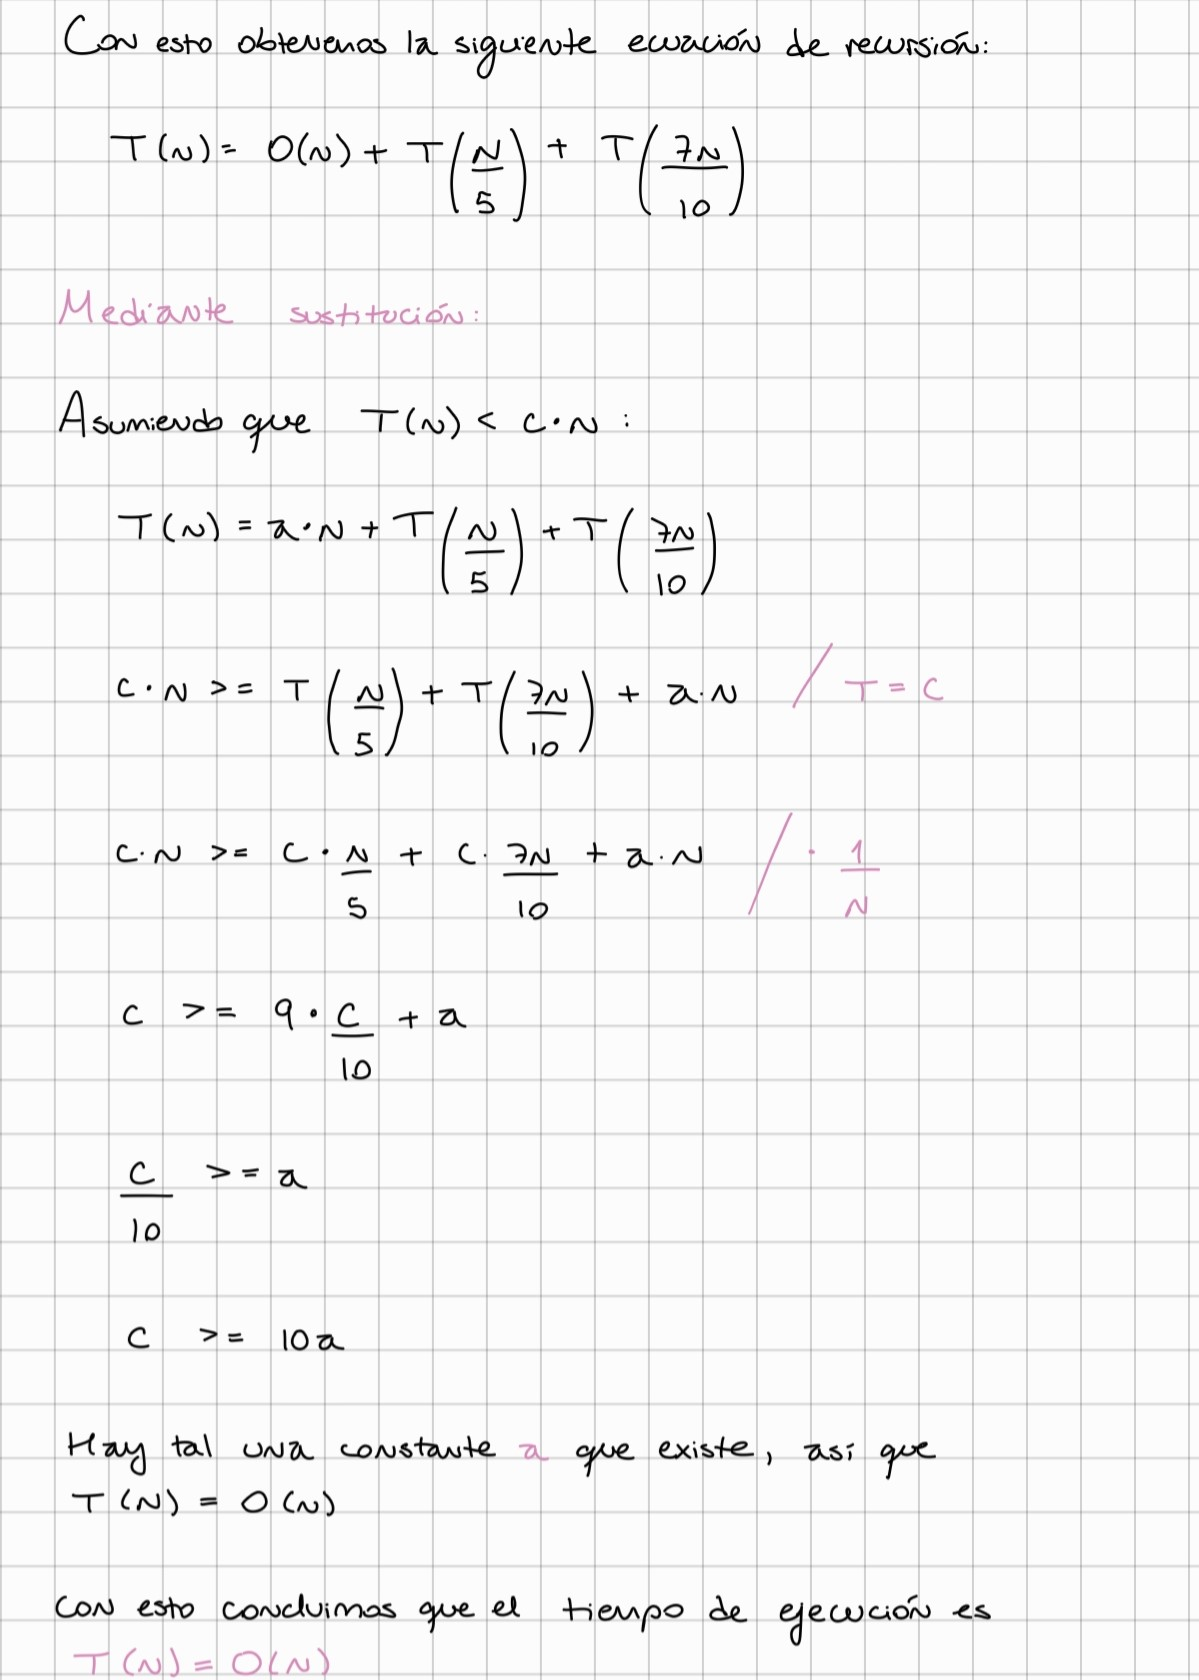

# 4. Correctitud

A continuación se demuestra la correctitud del algoritmo **Select** mediante inducción matemática.

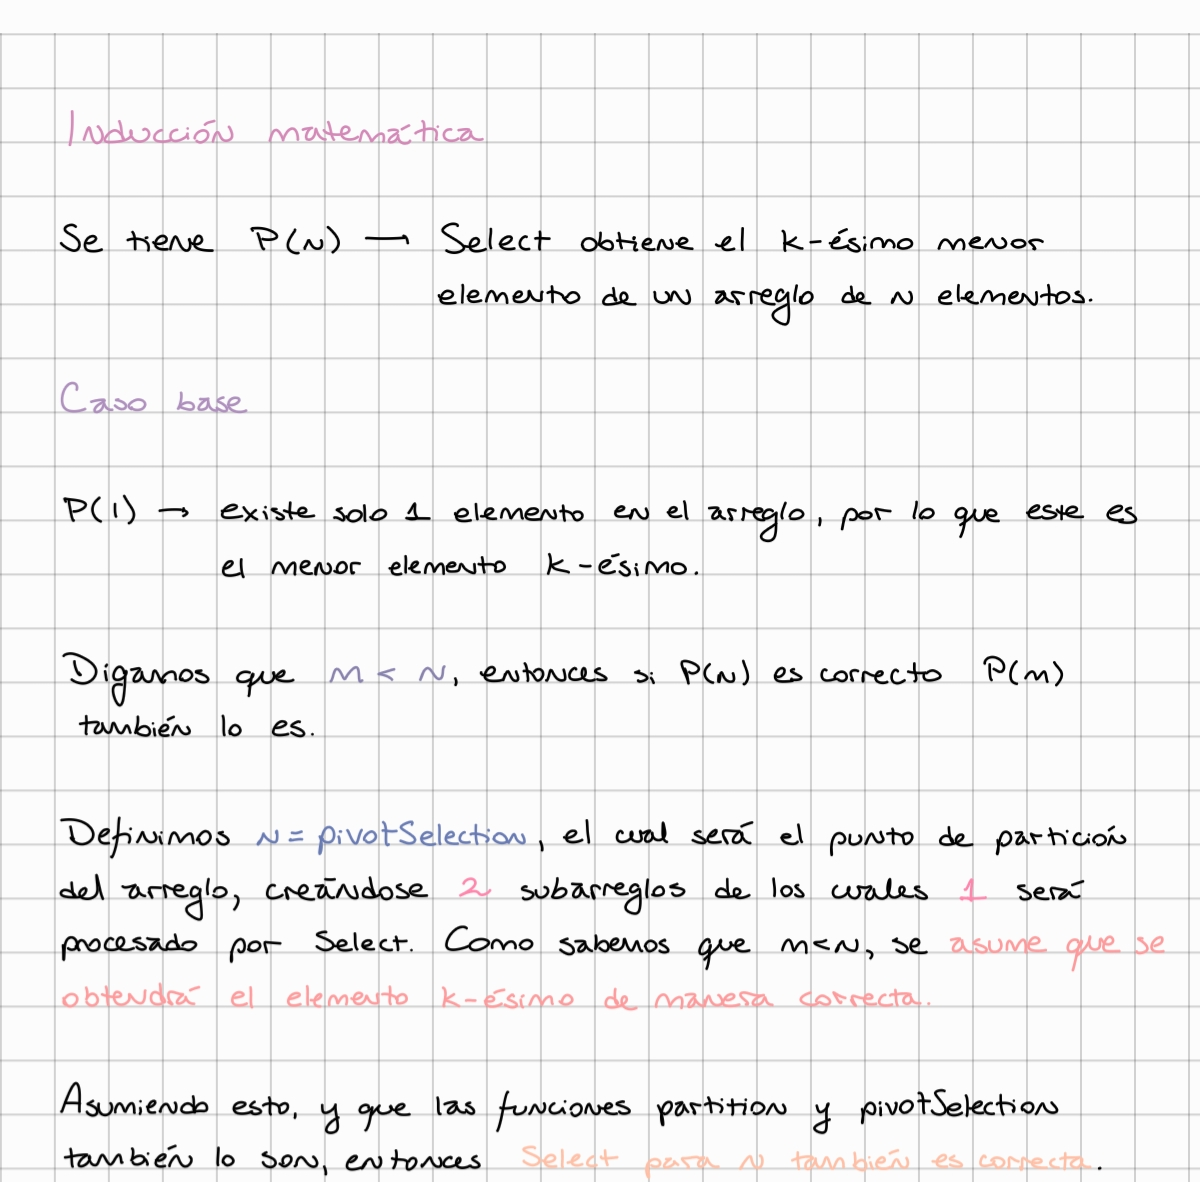

# 5. Experimentos


## 5.1 Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente.
* cantidad de comparaciones del mejor caso calculadas matemáticamente.
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias.

para tamaños de problemas con $n \in [5,19]$.

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números entre 1 y 100.

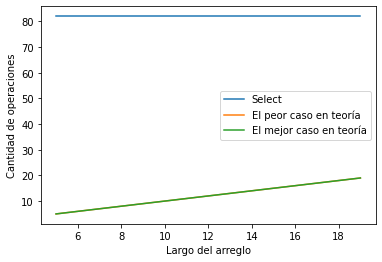

In [7]:
from itertools import count
import matplotlib.pyplot as plt 
import math 
import random

x=[n for n in range(5,20)]
k = 3 
y1=[n for n in range(5,20)] # peor caso
y2=[n for n in range(5,20)] # mejor caso
y=[]; 

for n in range(5,20):
  a = random.sample(range(1, 100), n)
  cont = [0]
  select(arr, k, cont, verbose = False)
  y.append(cont[0])

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select", "El peor caso en teoría", "El mejor caso en teoría"])

plt.xlabel('Largo del arreglo')
plt.ylabel('Cantidad de operaciones')
plt.show()

### Análisis de resultados

* Si analizamos el gráfico de arriba, podemos notar que se realizan la misma cantidad de comparaciones en el mejor y peor caso, ya que el tiempo de ejecución es $O(n)$ para todos los casos, esto debido a la elección del pivote. Por lo cual podemos concluir que la cantidad de comparaciones depende unicamente del largo del arreglo.

* Por otro lado las comparaciones que realiza en el algoritmo son mayores, pero de igual manera sigue siendo lineal, por lo cual es acorde al tiempo de ejecución.


## 5.2 Tiempo de ejecución (Selection vs Randomized-Selection)

En los siguientes gráficos se reporta el tiempo de ejecución de los algoritmos de ordenamiento **Selection** y **Randomized-Selection** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$. A partir de los gráficos obtenidos se realizará una comparación del rendimiento de ambos algoritmos.

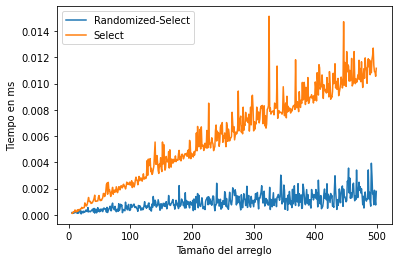

In [5]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import numpy as np

def Partition(a, p, r):

    x = a[r]
    i = p - 1
    for j in range(p, r):
        if a[j] <= x:
            i = i + 1
            
            a[i], a[j] = a[j], a[i]

    a[i+1], a[r] = a[r], a[i+1]

    return i + 1

def RandomizedPartition(a, p, r):
    
    i = np.random.randint(p, r)
    a[i], a[p] = a[p], a[i]
    return Partition(a, p, r)

def Randomizedselect(a, p, r, i):
    if p == r:
        return a[p]
    q = RandomizedPartition(a, p, r)
    
    k = q - p +1
    if i == k:
        return a[q]
    elif i < k:
        return Randomizedselect(a, p, q - 1, i)
    else:
        return Randomizedselect(a, q + 1, r, i - k)


x=[]; y=[]
y1=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  cont = [0]
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  t1 = repeat(setup="from __main__ import Randomizedselect", stmt=f"Randomizedselect({a},{0},{n-1},{3})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import select", stmt=f"select({a},{3},{cont},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Randomized-Select", "Select"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Lo primero que podemos notar al ver el gráfico es que **Randomized-Select** tiene un tiempo de ejecución mucho menor a **Select**, lo cual se puede deber a los costos adicionales que este posee, tales como:
  * Dividir el arreglo en subarreglo de tamaño 5.
  * Ordenarlos con InsertionSort.
  * Obtener la mediana de medianas.

Lo cual es algo que no realiza Randomized, el cual obtiene un pivote random y lo particiona a partir de este, ahorrandose todo el trabajo extra que realiza select. Por lo que se puede concluir que a pesar de que *Selection* realice mejores particiones y tenga un mejor **Peor caso $O(n)$**, no lo hace mas rapido al momento de ejecutarse, lo cual fue algo que realmente me sorprendió.

Por ultimo los peaks que podemos observar en el gráfico se deben a las variaciones en la carga de trabajo de la máquina virtual de Google Colab 
